# Link utilizado para pegar as cotações das moedas:https://docs.awesomeapi.com.br/api-de-moedas#legendas


# Importando Bibliotecas utilizadas no projeto

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Solicitando as informações ao usuário de qual moeda fazer a cotação

In [2]:
cotacao_moeda = str(input('Qual moeda fazer cotação: '))

Qual moeda fazer cotação: EUR


# Solicitando as informações ao usuário de quantos dias anteriores fazer a cotação do BID

In [3]:
cotacoes_anteriores = int(input('Pegar cotação de quantos dias anteriores: '))

Pegar cotação de quantos dias anteriores: 30


# Solicitando as informações ao usuário de qual determinado tempo fazer a cotação do BID

In [4]:
data_cotacao_inicio = str(input('Data de inicio: '))
data_cotacao_final = str(input('Data final: '))

Data de inicio: 20210306
Data final: 20220306


# Trasformando a URL da API em uma constante

In [5]:
url_cotacao_atualizada = f"https://economia.awesomeapi.com.br/json/last/{cotacao_moeda}-BRL"
url_cotacao_dias_anteriores = f"https://economia.awesomeapi.com.br/json/daily/{cotacao_moeda}-BRL/{cotacoes_anteriores}"
url_cotacao_determinada_data = f"https://economia.awesomeapi.com.br/{cotacao_moeda}-BRL/365?start_date={data_cotacao_inicio}&end_date={data_cotacao_final}"

# Criando a função que puxa os dados atualizados da API

In [6]:
def cotacao_atualizada():
    r = requests.get(url_cotacao_atualizada)
    r_json = r.json()
    return r.json()

# Criando a função que puxa os dados dos dias anteriores da API

In [7]:
def cotacao_dias_anteriores():
    r = requests.get(url_cotacao_dias_anteriores)
    r_json = r.json()
    return r.json()

# Criando a função que puxa os dados de determinada data na API

In [8]:
def cotacao_por_data():
    r = requests.get(url_cotacao_determinada_data)
    r_json = r.json()
    return r_json

# Mostrando na tela informações da cotação atualizada em um dicionário

In [9]:
cotacao_atual_dict = cotacao_atualizada()
cotacao_atual_dict

{'EURBRL': {'code': 'EUR',
  'codein': 'BRL',
  'name': 'Euro/Real Brasileiro',
  'high': '5.5338',
  'low': '5.4998',
  'varBid': '-0.0253',
  'pctChange': '-0.46',
  'bid': '5.5039',
  'ask': '5.5069',
  'timestamp': '1646613962',
  'create_date': '2022-03-06 21:46:02'}}

# Mostrando na tela informações da cotação atualizada em um DataFrame

In [10]:
cotacao_atual_df = pd.DataFrame(cotacao_atual_dict)
cotacao_atual_df

,EURBRL
ask,5.5069
bid,5.5039
code,EUR
codein,BRL
create_date,2022-03-06 21:46:02
high,5.5338
low,5.4998
name,Euro/Real Brasileiro
pctChange,-0.46
timestamp,1646613962


# Mostrando na tela informações da cotação dos últimos 30 dias em um dicionário

In [12]:
cotacao_ultimos_dias_dict = cotacao_dias_anteriores()
print(cotacao_ultimos_dias_dict)


[{'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '6.2704', 'low': '6.2598', 'varBid': '-0.0045', 'pctChange': '-0.07', 'bid': '6.2592', 'ask': '6.2626', 'timestamp': '1637722530', 'create_date': '2021-11-23 23:55:30'}, {'high': '6.2329', 'low': '6.2248', 'varBid': '-0.0006', 'pctChange': '-0.01', 'bid': '6.2227', 'ask': '6.229', 'timestamp': '1625799574'}, {'high': '6.7669', 'low': '6.6161', 'varBid': '0.1212', 'pctChange': '1.83', 'bid': '6.7573', 'ask': '6.76', 'timestamp': '1618001897'}, {'high': '6.6375', 'low': '6.6283', 'varBid': '-0.008', 'pctChange': '-0.12', 'bid': '6.6286', 'ask': '6.6303', 'timestamp': '1617937044'}, {'high': '6.6666', 'low': '6.6583', 'varBid': '-0.0005', 'pctChange': '-0.01', 'bid': '6.663', 'ask': '6.6643', 'timestamp': '1617850775'}, {'high': '6.6415', 'low': '6.6356', 'varBid': '-0.0027', 'pctChange': '-0.04', 'bid': '6.6336', 'ask': '6.6382', 'timestamp': '1617764255'}, {'high': '6.6962', 'low': '6.6855', 'varBid': '-0.0013', '

In [13]:
lista_dias = []
for dia in range(1, cotacoes_anteriores+1):
    lista_dias.append(dia)
print(lista_dias)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [14]:
lista_bid_ultimos_dias = []
for bid in cotacao_ultimos_dias_dict:
    lista_bid_ultimos_dias.append(float(bid['bid']))
lista_bid_ultimos_dias.reverse()

In [15]:
print(lista_bid_ultimos_dias)

[6.4663, 6.4401, 6.487, 6.4697, 6.4627, 6.4805, 6.5204, 6.5273, 6.5031, 6.5071, 6.5141, 6.5216, 6.5339, 6.5264, 6.5667, 6.539, 6.6458, 6.8012, 6.7583, 6.6012, 6.7218, 6.7132, 6.7154, 6.6868, 6.6336, 6.663, 6.6286, 6.7573, 6.2227, 6.2592]


In [16]:
lista_axiliar = list(zip(lista_dias,lista_bid_ultimos_dias))
print(lista_axiliar)

[(1, 6.4663), (2, 6.4401), (3, 6.487), (4, 6.4697), (5, 6.4627), (6, 6.4805), (7, 6.5204), (8, 6.5273), (9, 6.5031), (10, 6.5071), (11, 6.5141), (12, 6.5216), (13, 6.5339), (14, 6.5264), (15, 6.5667), (16, 6.539), (17, 6.6458), (18, 6.8012), (19, 6.7583), (20, 6.6012), (21, 6.7218), (22, 6.7132), (23, 6.7154), (24, 6.6868), (25, 6.6336), (26, 6.663), (27, 6.6286), (28, 6.7573), (29, 6.2227), (30, 6.2592)]


# Trasformando as informações da cotação dos últimos 30 dias em um DataFrame

In [17]:
tabela_bid_df = pd.DataFrame(lista_axiliar)
tabela_bid_df = tabela_bid_df.rename(columns={0:'Dia',1:"Bid"})



# Mostrando na tela informações da cotação dos últimos 30 dias em um DataFrame

In [25]:
tabela_bid_df

,Bid
Dia,
1,6.4663
2,6.4401
3,6.4870
4,6.4697
5,6.4627
6,6.4805
7,6.5204
8,6.5273
9,6.5031


# Mostrando em um gráfico a cotação dos últimos 30 dias do BID

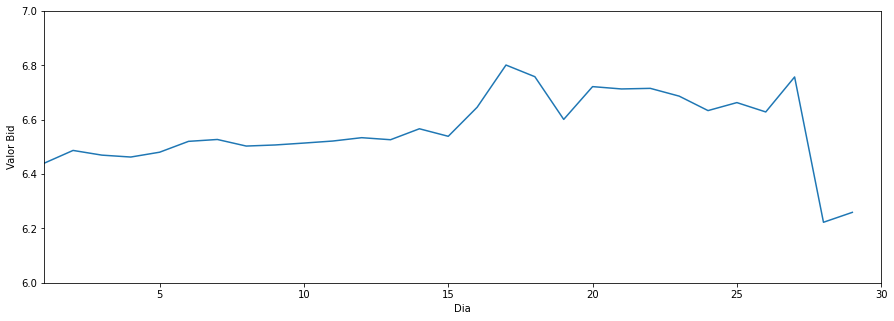

In [21]:
plt.figure(figsize=(15,5))
plt.plot(tabela_bid_df['Bid'])
plt.axis([1,30,6.0,7.0])
plt.ylabel('Valor Bid')
plt.xlabel('Dia')

plt.show()


# Pegando a cotação do BID dentro de 1 ano e passando para um dicionário

In [26]:
cotacao_bid_data_dict = cotacao_por_data()

In [27]:
lista_bid_data = []
for bid in cotacao_bid_data_dict:
    lista_bid_data.append(float(bid['bid']))
lista_bid_data.reverse()

In [28]:
print(lista_bid_data)

[6.2069, 6.1866, 6.1514, 6.1525, 6.1546, 6.1552, 6.1525, 6.1055, 6.106, 6.1049, 6.0245, 6.0234, 6.025, 6.0122, 5.9836, 5.9841, 5.9793, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9804, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9809, 5.9798, 5.9814, 5.9809, 5.9857, 5.9911, 5.9981, 5.9981, 5.9991, 5.9943, 5.99, 5.9586, 5.9586, 5.957, 5.9565, 5.9342, 5.9347, 5.9374, 5.9363, 5.9363, 5.9358, 5.9432, 5.9569, 5.9916, 5.972, 5.9592, 5.9476, 5.9482, 5.9482, 5.9476, 5.945, 5.945, 5.9466, 5.9424, 5.9419, 5.9413, 5.9355, 5.935, 5.9355, 6.0445, 6.0421, 6.0411, 6.0458, 6.1098, 6.0981, 6.101, 6.101, 6.0999, 6.1065, 6.1065, 6.1065, 6.1065, 6.1065, 6.106, 6.1055, 6.1055, 6.1055, 6.1055, 6.1055, 6.1055, 6.1055, 6.1044, 6.1049, 6.1044, 6.1055, 6.1044, 6.1044, 6.1044, 6.1044, 6.1044, 6.1044, 6.1044, 6.1044, 6.1007, 6.1001, 6.0884, 6.0922, 6.0702, 6.0396, 6.0239, 6.0216, 6.021, 6.02

# Mostrando em um gráfico os valores do BID em 1 ano

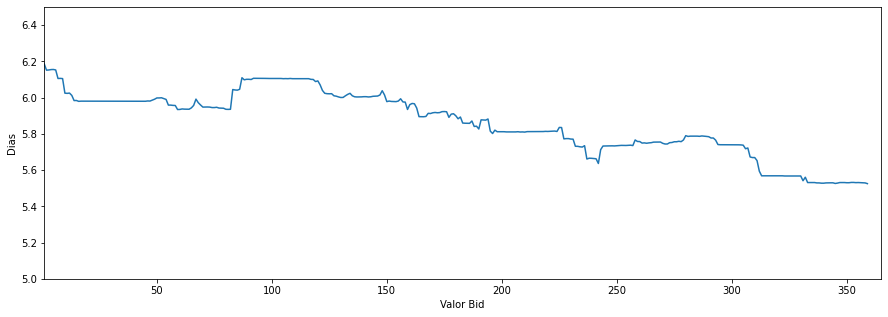

In [34]:
plt.figure(figsize=(15,5))
plt.plot(lista_bid_data)
plt.xlabel('Valor Bid')
plt.ylabel('Dias')
plt.axis([1,365,5.0,6.5])
plt.show()

# Legendas
## Bid = Compra
## Ask = Venda
## VarBid = Variação
## pctChange = Porcentagem de Variação
## High = Maximo
## Low = Mínimo